# Tutorial to D-measure

This tutorial illustrates the calculation of the distance between two graphs using D-measure. This implementation was made by Daniel Schwalbe-Koda. It is compatible with the `networkx` package. If you use this code or tutorial, please cite 

D. Schwalbe-Koda, Z. Jensen, E. Olivetti, and R. Gómez-Bombarelli. "Graph similarity drives zeolite diffusionless transformations and intergrowth." _Nature Materials_ (2019). Link: https://www.nature.com/articles/s41563-019-0486-1

The D-measure algorithm is based on the following work:

* Schieber et al. _Nat. Comms._ **8**, 13928 (2017). Link: https://doi.org/10.1038/ncomms13928

## Imports

In [1]:
import sys
sys.path.append('../zeograph')

In [2]:
import networkx as nx
import dmeasure as dm
import matplotlib.pyplot as plt
%matplotlib inline

## Example 1: Table 1 from the main article

The following example is extracted from the main article. We compare the following graphs:

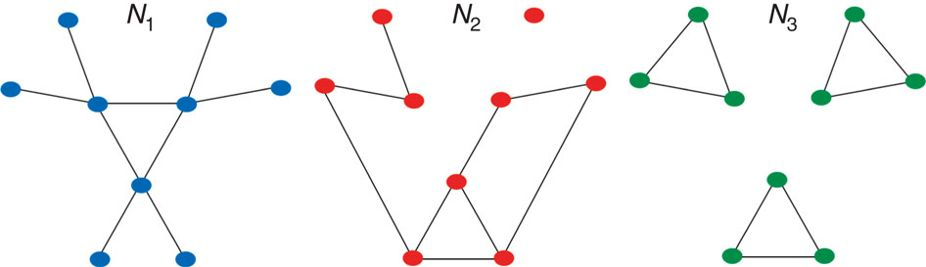

First, we create such graphs using `networkx`:

In [3]:
N1 = nx.from_dict_of_lists({
    0: [1],
    1: [0, 2, 3, 6],
    2: [1],
    3: [1, 4, 5, 6],
    4: [3],
    5: [3],
    6: [1, 3, 7, 8],
    7: [6],
    8: [6],
})

N2 = nx.from_dict_of_lists({
    0: [1],
    1: [0, 2],
    2: [1, 3],
    3: [2, 4, 5],
    4: [3, 5, 7],
    5: [3, 4, 6],
    6: [5, 7],
    7: [4, 6],
    8: [],
})

N3 = nx.from_dict_of_lists({
    0: [1, 2],
    1: [0, 2],
    2: [0, 1],
    3: [4, 5],
    4: [3, 5],
    5: [3, 4],
    6: [7, 8],
    7: [6, 8],
    8: [6, 7],
})

Verifying that we have the same graphs:

/home/dskoda/packages/conda/envs/zeograph/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


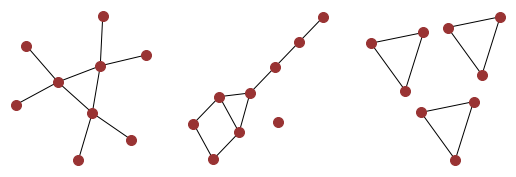

In [4]:
fig, ax = plt.subplots(1, 3, figsize=(9, 3))

nx_draw_params = {
    'node_color': '#993333',
    'node_size': 100
}

nx.draw_kamada_kawai(N1, ax=ax[0], **nx_draw_params)
nx.draw_kamada_kawai(N2, ax=ax[1], **nx_draw_params)
nx.draw_kamada_kawai(N3, ax=ax[2], **nx_draw_params)
plt.show()

Now, we just have to calculate the distance between them:

In [5]:
d12 = dm.dmeasure(N1, N2)
d13 = dm.dmeasure(N1, N3)
d23 = dm.dmeasure(N2, N3)

In [6]:
print('(N1, N2): D = %.3f' % d12)
print('(N1, N3): D = %.3f' % d13)
print('(N2, N3): D = %.3f' % d23)

(N1, N2): D = 0.249
(N1, N3): D = 0.565
(N2, N3): D = 0.471


Compare these values with the ones on the original article:
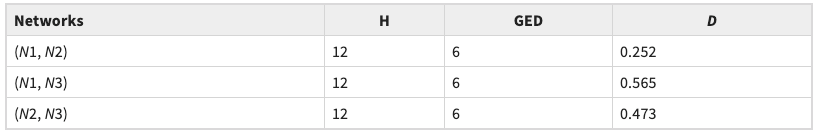

The small discrepancies are in accordance to the original code published by the authors. In it, the same systematic underestimation of the distances on the order of 1e-3 is found.